In [1]:
import pandas as pd
import numpy as np 
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import requests
import json
from urlparse import urlparse
from itertools import islice
from calendar import month_name
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator() 
yearsFmt = mdates.DateFormatter('%Y')

In [2]:
stockAnalysisRequest = requests.get("https://www.blackrock.com/tools/hackathon/performance?" \
             + "betaPortfolios=SNP500&identifiers=GOOG&riskFreeRatePortfolio=LTBILL1-3M").json()
# with open('stockAnalysisRequest.json', 'w') as outfile: 
#     json.dump(stockAnalysisRequest, outfile)

In [3]:
Y = [y[1] for y in islice(stockAnalysisRequest['resultMap']['RETURNS'][0]['performanceChart'], 0, None, 1)]
X = list(range(len(Y)))

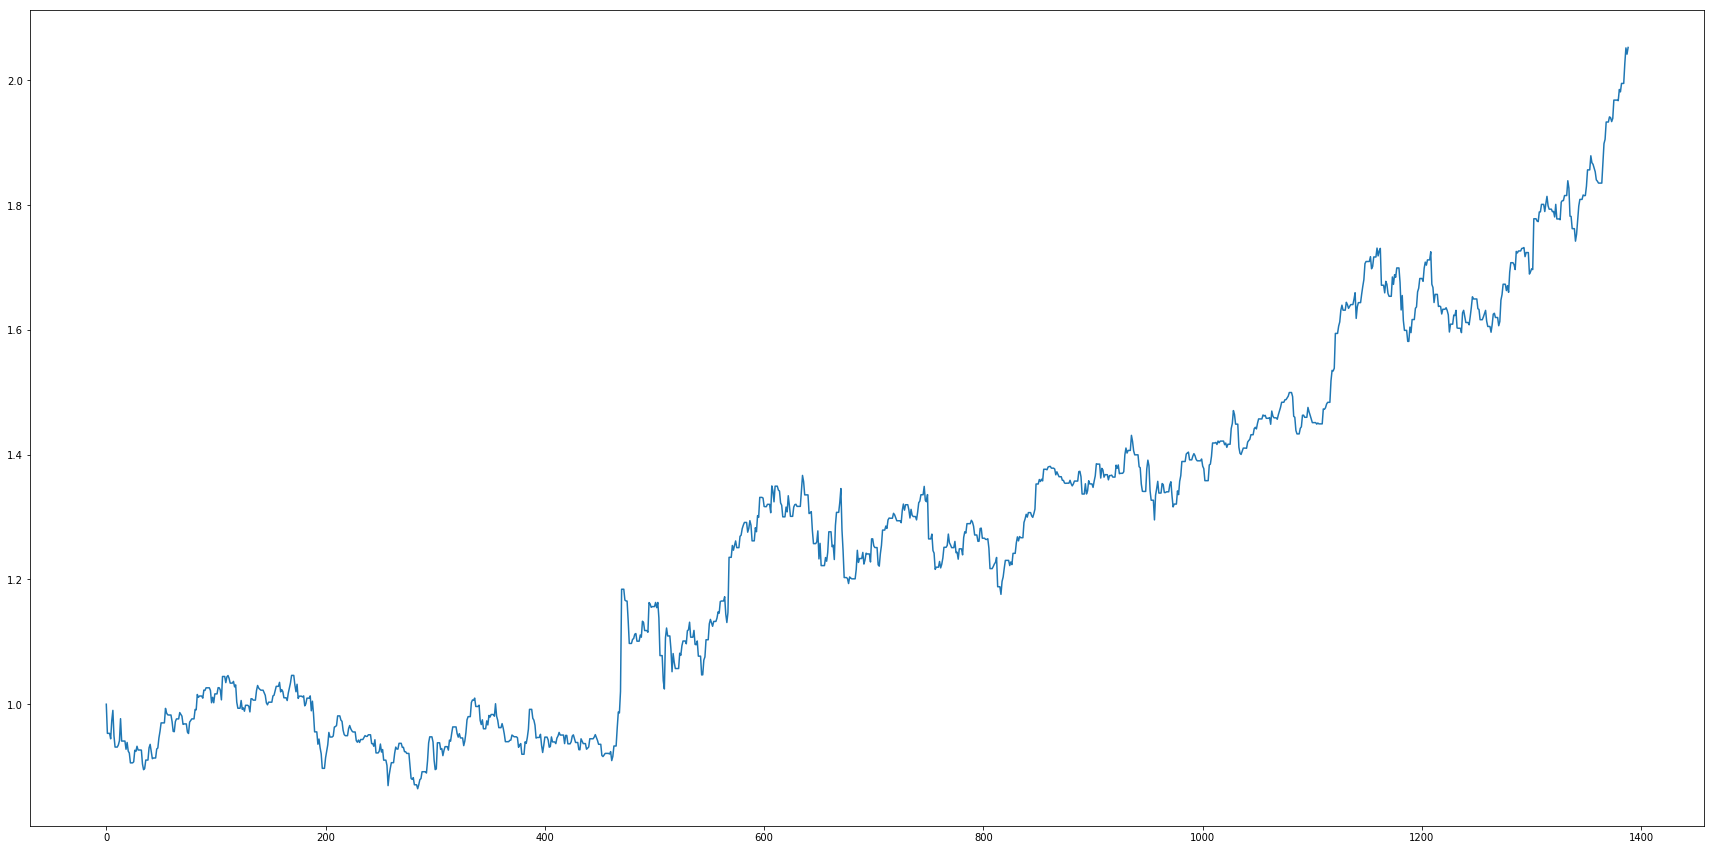

In [4]:
plt.figure(figsize=(30,15))
plt.plot(X,Y)
plt.show()

In [5]:
stockAnalysis2017Request = requests.get("https://www.blackrock.com/tools/hackathon/performance?" \
             + "betaPortfolios=SNP500&endDate=20171231&identifiers=GOOG&riskFreeRatePortfolio=LTBILL1-3M&startDate=20170101").json()
# with open('stockAnalysisRequest.json', 'w') as outfile: 
#     json.dump(stockAnalysis2017Request, outfile)

In [6]:
investment = 1000 
Y = [investment*y[1] for y in islice(stockAnalysis2017Request['resultMap']['RETURNS'][0]['performanceChart'], 0, None, 1)]
X = list(range(len(Y)))

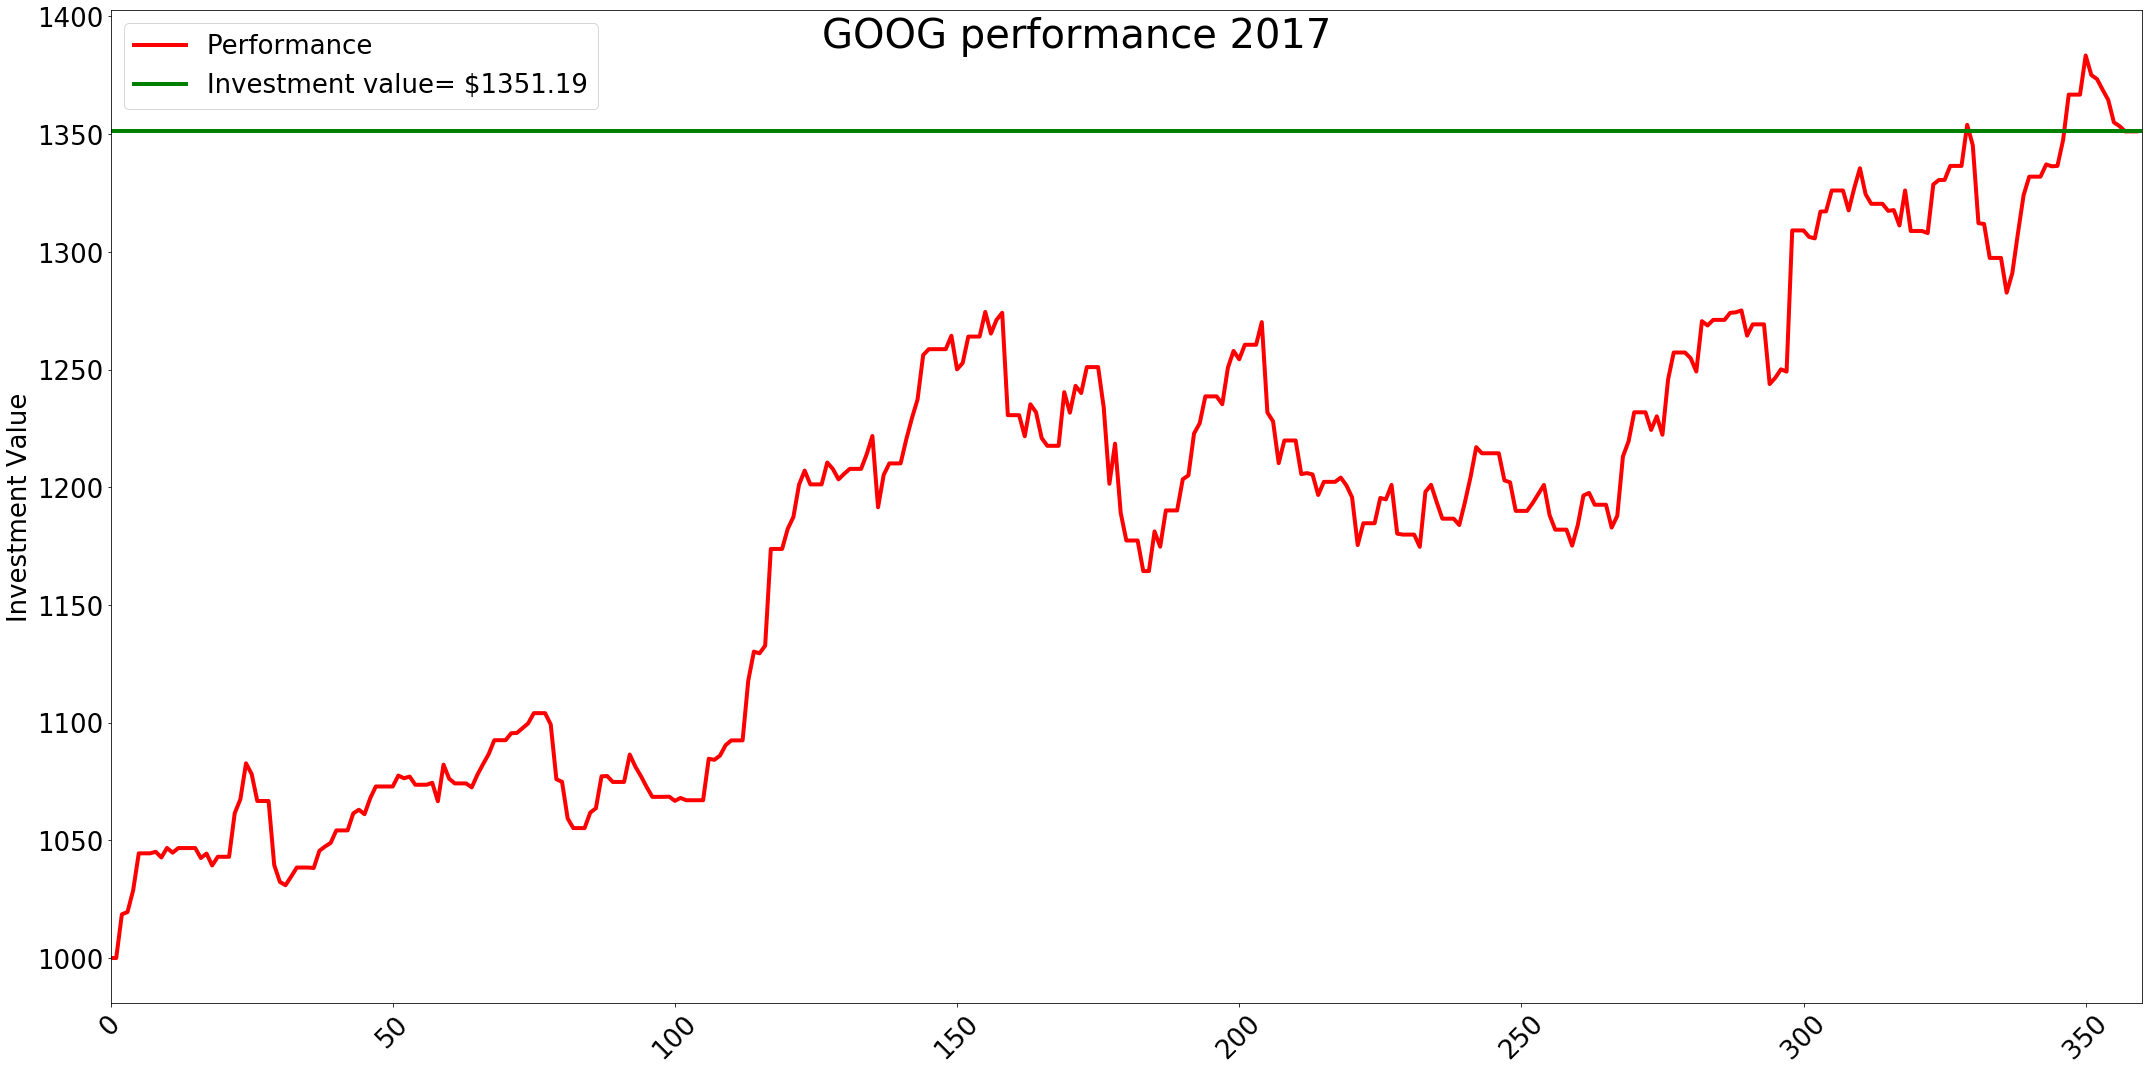

In [7]:
fig, ax = plt.subplots(figsize=(30,15))
plt.xlim(0,len(X))
plt.ylabel('Investment Value', fontsize=26)
plt.yticks(size=26)
plt.xticks(size=26, rotation=45) #np.arange(len(X)), month_name[1:13], 
# ax.xaxis.set_major_locator(months)
# for index, label in enumerate(ax.xaxis.get_ticklabels()):
#     if index % n != 0:
#         label.set_visible(False)
ax.plot(X, Y, c='red', label='Performance', linewidth=4)
plt.suptitle('GOOG performance 2017',fontsize=40)
ax.axhline(Y[-1], label='Investment value= ${:.2f}'.format(Y[-1]), linewidth=4, c='green')
ax.legend(prop={'size': 26})
plt.tight_layout()
plt.show()

In [8]:
stocks = ['GOOG','AAPL','']
portfolioAnalysisRequest = requests.get("https://www.blackrock.com/tools/hackathon/performance?" \
             + "betaPortfolios=SNP500&endDate=20171231&identifiers=GOOG,AAPL,MSFT"\
             + "&riskFreeRatePortfolio=LTBILL1-3M&startDate=20170101").json()
# with open('portfolioAnalysisRequest.json', 'w') as outfile: 
#     json.dump(portfolioAnalysisRequest, outfile)

In [9]:
investment = 1000
results = portfolioAnalysisRequest['resultMap']['RETURNS']
Y = [0]*len(results[0]['performanceChart'])
for i in range(len(results[0]['performanceChart'])):
    Y[i] = investment*((results[0]['performanceChart'][i][1]
                        +results[1]['performanceChart'][i][1]
                        +results[2]['performanceChart'][i][1])/len(results))
X = list(range(len(Y)))

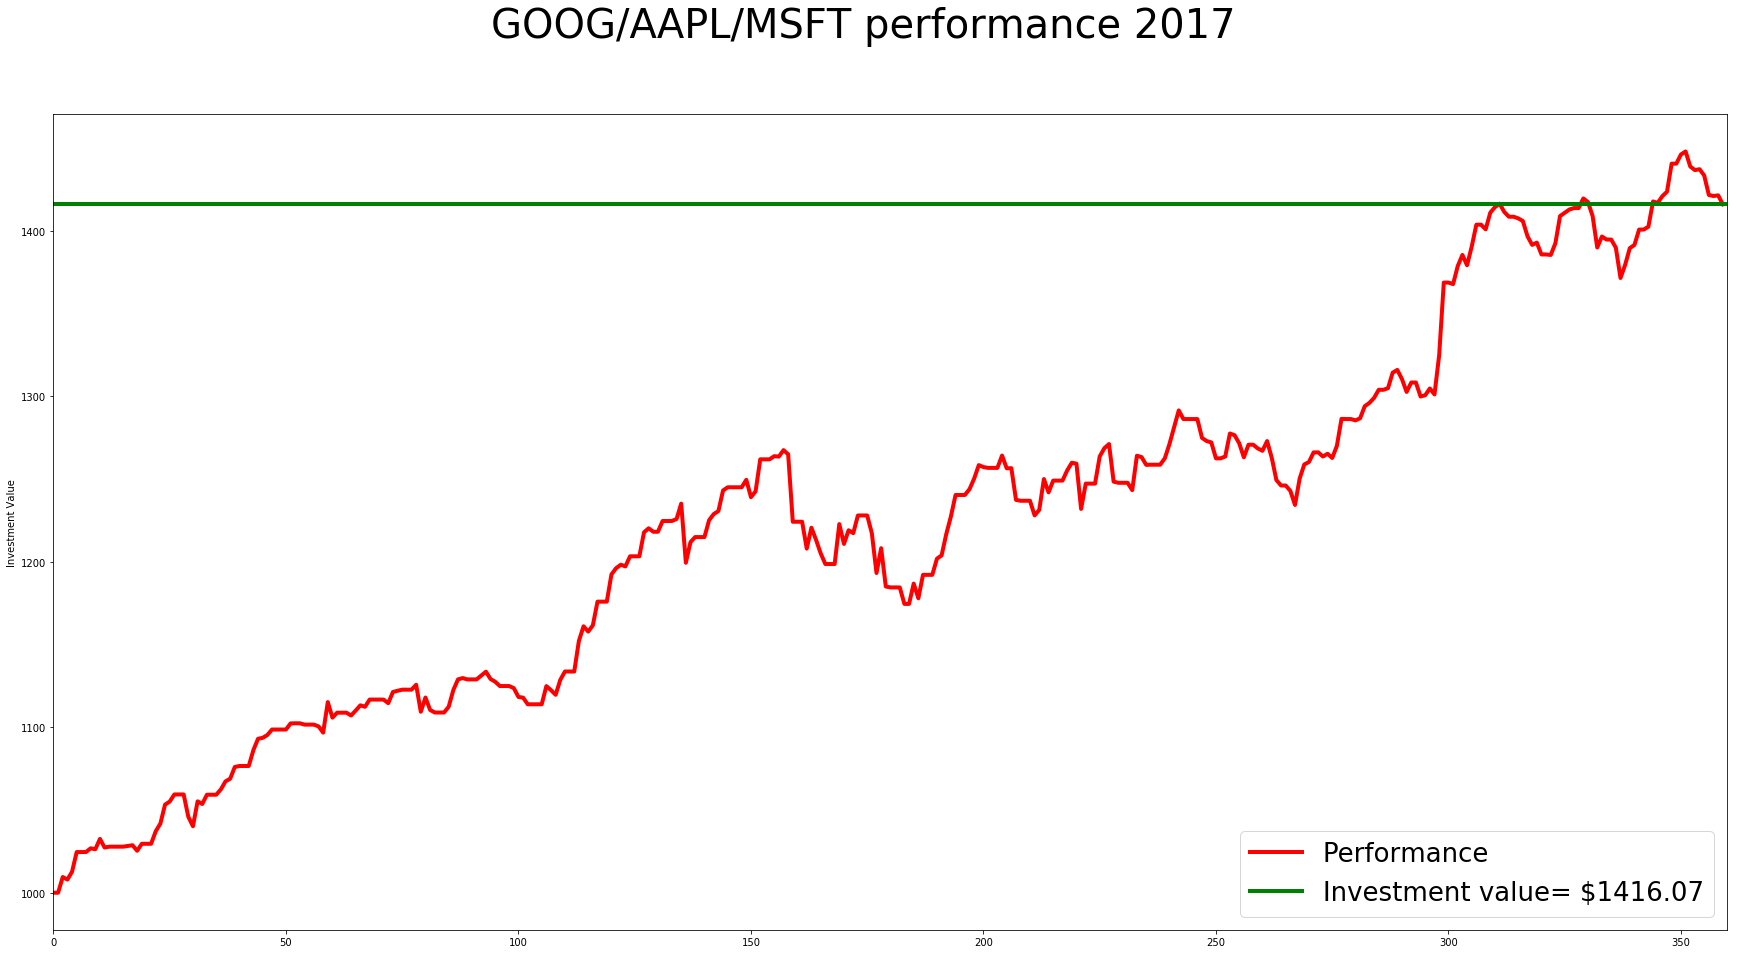

In [10]:
fig, ax = plt.subplots(figsize=(30,15))
plt.xlim(0,len(X))
ax.plot(X, Y, c='red', label='Performance', linewidth=4)
plt.suptitle('GOOG/AAPL/MSFT performance 2017',fontsize=40)
ax.axhline(Y[-1], label='Investment value= ${:.2f}'.format(Y[-1]), linewidth=4, c='green')
plt.ylabel('Investment Value')
ax.legend(prop={'size': 26})
plt.show()

In [11]:
def apiRequest(identifiers, startDate, endDate):
    portfolioAnalysisRequest = requests.get("https://www.blackrock.com/tools/hackathon/performance?" \
                 + "betaPortfolios=SNP500&endDate="+endDate+"&identifiers="+",".join(identifiers)\
                 + "&riskFreeRatePortfolio=LTBILL1-3M&startDate="+startDate).json()
    return portfolioAnalysisRequest

In [19]:
def calculateGrowth(investment, portfolioAnalysisRequest):
    results = portfolioAnalysisRequest['resultMap']['RETURNS']
    Y = [0]*len(results[0]['performanceChart'])
    for i in range(len(results[0]['performanceChart'])):
        y = 0
        for company in range(len(results)):
            y += results[company]['performanceChart'][i][1]
        Y[i] = investment*(y/len(results))
    X = list(range(len(Y)))
    return X,Y

In [13]:
def _date(dateString):
    y,m,d = int(dateString[0:4]), int(dateString[4:6]), int(dateString[6:8])
    return datetime.date(y,m,d)

In [27]:
def plotGrowth(X, Y, identifiers, startDate, endDate, ax=None):
    if ax == None:
        fig, ax = plt.subplots(figsize=(30,15))
    title = "{} performance from {} to {}".format("/".join(identifiers),_date(startDate),_date(endDate))
    plt.xlim(0,len(X))
    plt.ylabel('Investment Value', fontsize=26)
    plt.yticks(size=26)
    plt.xticks(size=26, rotation=45) #np.arange(len(X)), month_name[1:13], 
    # ax.xaxis.set_major_locator(months)
    # for index, label in enumerate(ax.xaxis.get_ticklabels()):
    #     if index % n != 0:
    #         label.set_visible(False)
    ax.plot(X, Y, c='red', label='Performance', linewidth=4)
    plt.suptitle(title,fontsize=40)
    ax.axhline(Y[-1], label='Investment value= ${:.2f}'.format(Y[-1]), linewidth=4, c='green')
    ax.legend(prop={'size': 26})
    plt.tight_layout()
    plt.show()
#     plt.savefig('figure.png')

In [15]:
def createPortfolio(investment=1000, identifiers=['GOOG'], startDate='20170101', endDate='20171231'):
    portfolioAnalysisRequest = apiRequest(identifiers, startDate, endDate)
    X,Y = calculateGrowth(investment, portfolioAnalysisRequest)
    plotGrowth(X,Y,identifiers, startDate, endDate)

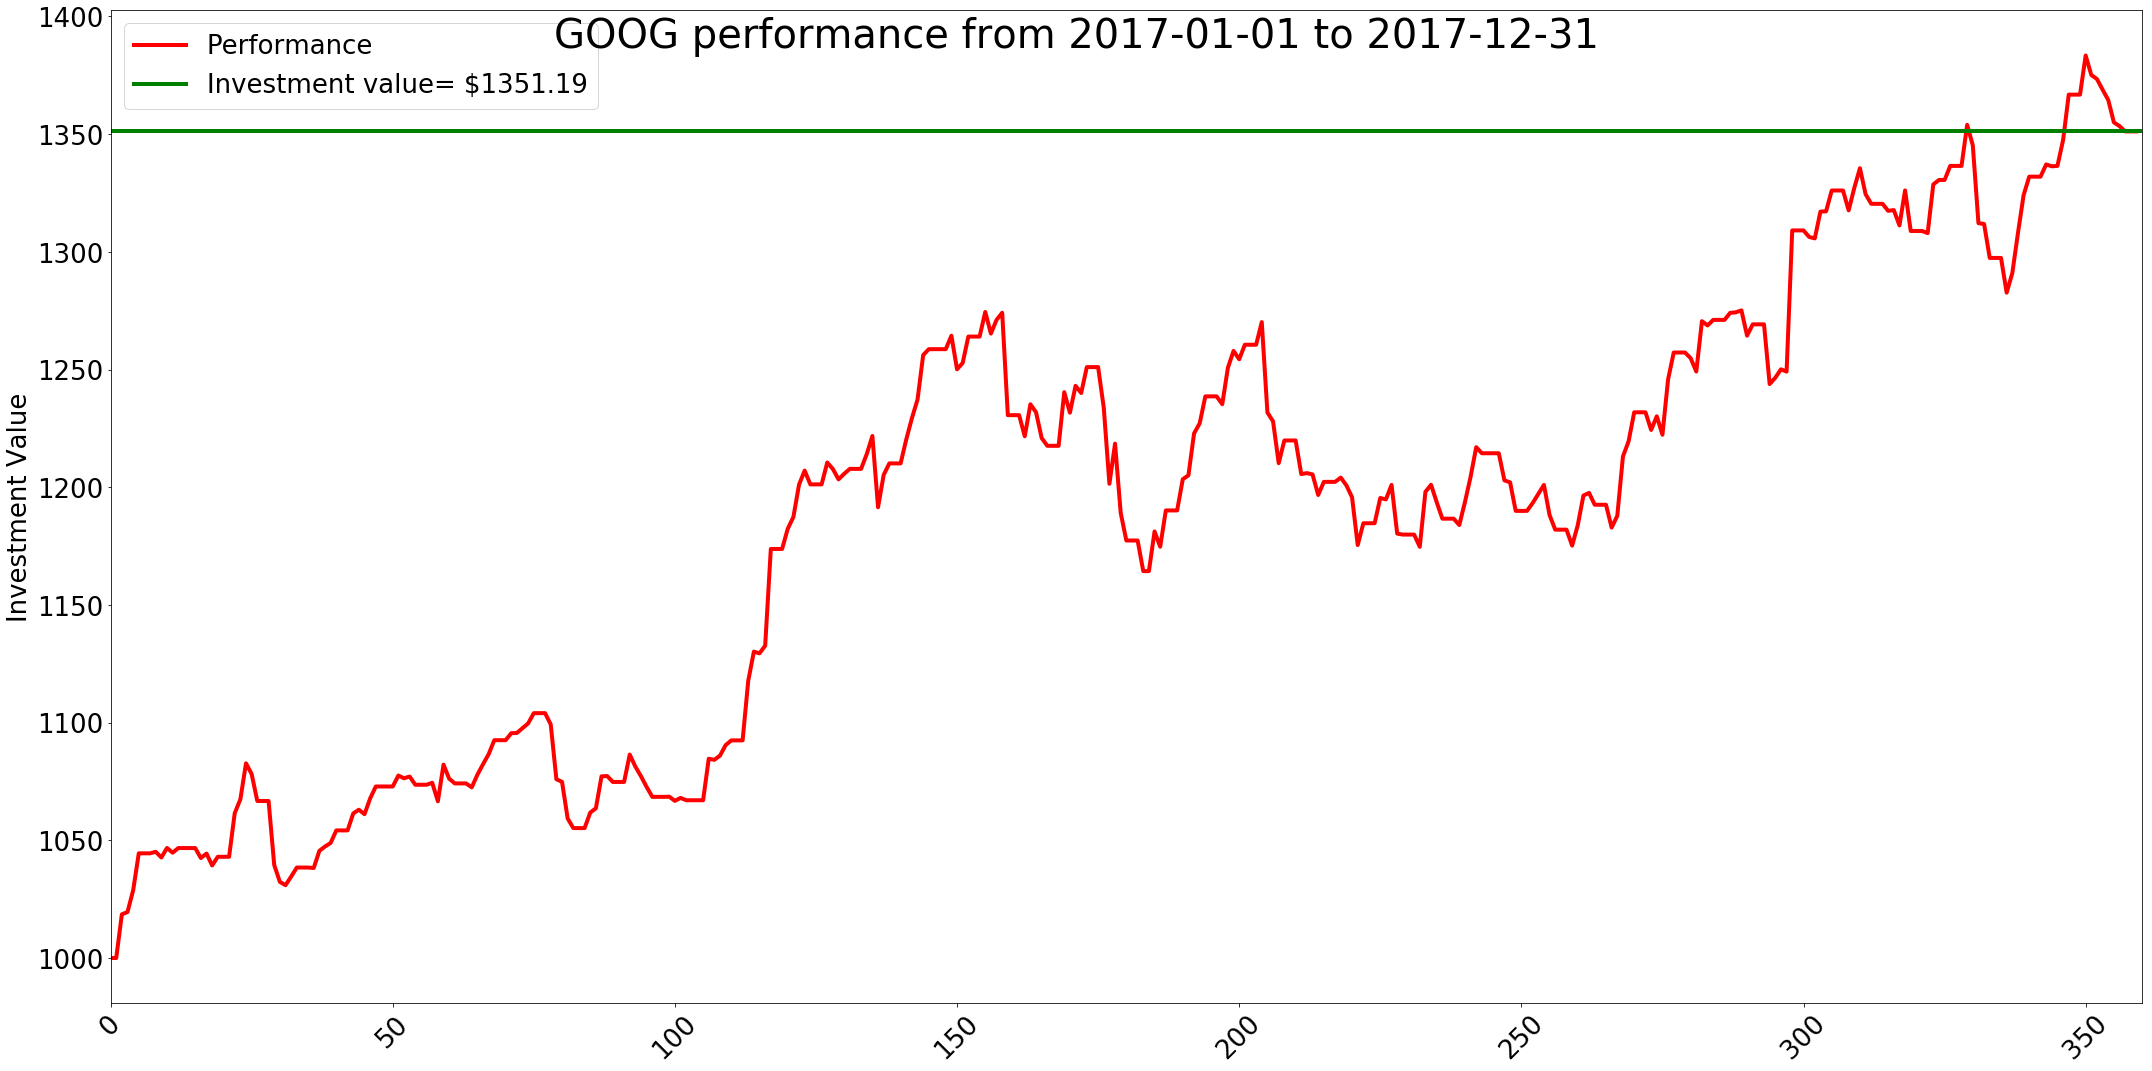

In [20]:
createPortfolio()

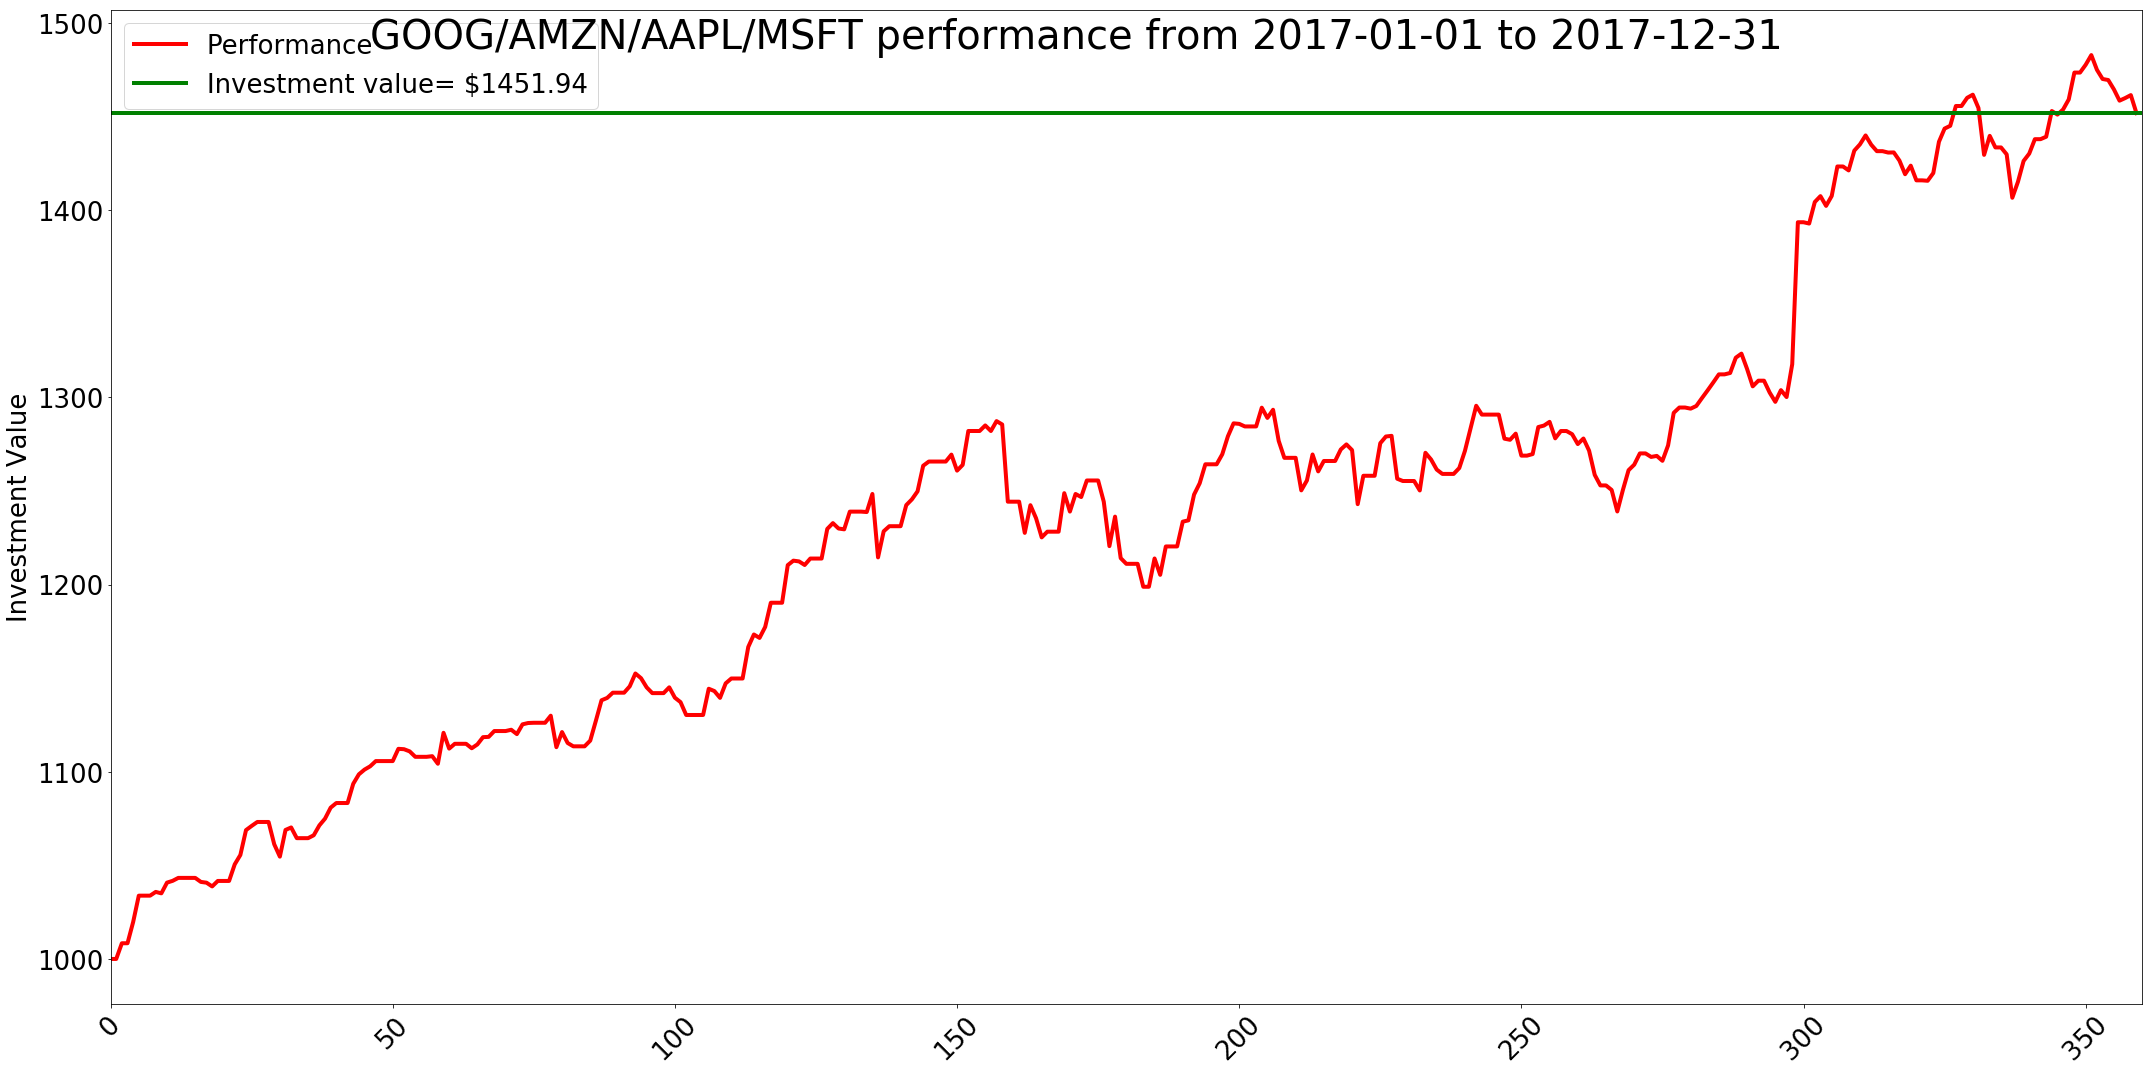

In [26]:
createPortfolio(identifiers=['GOOG','AMZN','AAPL','MSFT'])